In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
plt.rcParams["figure.autolayout"] = True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
from solvers import VPINN_HelmholtzImpedance
import torch
from torch import nn, optim
from utils import Legendre_Polynomials

## Defining the parameters of the equation

In [12]:
# f = lambda x: x ** -.25  # Source function
f = lambda x: 1  # Source function
k = 3. * (np.pi / 2)  # frequency
a, b = -1., +1.  # Domain
ga, gb = 0., 1.  # Values at the boundaries

## Training the neural network

In [13]:
width = 40
depth = 1
testfuncs = 40

epochs = 10000
lr = 1e-02
momentum = .2
cuda = False

model = VPINN_HelmholtzImpedance(f=f, k=k, a=a, b=b, ga=ga, gb=gb,
                                layers=[1] + [width for _ in range(depth)] + [1],
                                activation=nn.ReLU(inplace=False),
                                dropout_probs=None,
                                penalty=2,
                                N_quad=100,
                                seed=None,
                                cuda=cuda,
                                )

testfunctions = Legendre_Polynomials(testfuncs - 1)()
if cuda:
  model = model.cuda()
optimizer = optim.Adam(model.parameters(), lr=lr)
model.train_(epochs, testfunctions, optimizer)

Epoch 0 / 10000: loss = 1570893987840.0
Epoch 100 / 10000: loss = 1889832832.0
Epoch 200 / 10000: loss = 112521472.0
Epoch 300 / 10000: loss = 20460428.0
Epoch 400 / 10000: loss = 8645091.0
Epoch 500 / 10000: loss = 6373398.5
Epoch 600 / 10000: loss = 5936416.0
Epoch 700 / 10000: loss = 6581788.5
Epoch 800 / 10000: loss = 10528290.0
Epoch 900 / 10000: loss = 34092560.0
Epoch 1000 / 10000: loss = 177244224.0
Epoch 1100 / 10000: loss = 1788899840.0
Epoch 1200 / 10000: loss = 21984172032.0
Epoch 1300 / 10000: loss = 3346086912.0
Epoch 1400 / 10000: loss = 2261650688.0
Epoch 1500 / 10000: loss = 3801432.75
Epoch 1600 / 10000: loss = 3615380.0
Epoch 1700 / 10000: loss = 3598911.25
Epoch 1800 / 10000: loss = 3581705.0
Epoch 1900 / 10000: loss = 3560030.75
Epoch 2000 / 10000: loss = 3528224.5
Epoch 2100 / 10000: loss = 3484429.25
Epoch 2200 / 10000: loss = 3428380.0
Epoch 2300 / 10000: loss = 3344979.0
Epoch 2400 / 10000: loss = 2920826.75
Epoch 2500 / 10000: loss = 2667564.25
Epoch 2600 / 10

KeyboardInterrupt: 

## Evaluating the results

/home/sepeehr/anaconda3/envs/mcss/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/sepeehr/anaconda3/envs/mcss/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/sepeehr/anaconda3/envs/mcss/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/sepeehr/anaconda3/envs/mcss/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


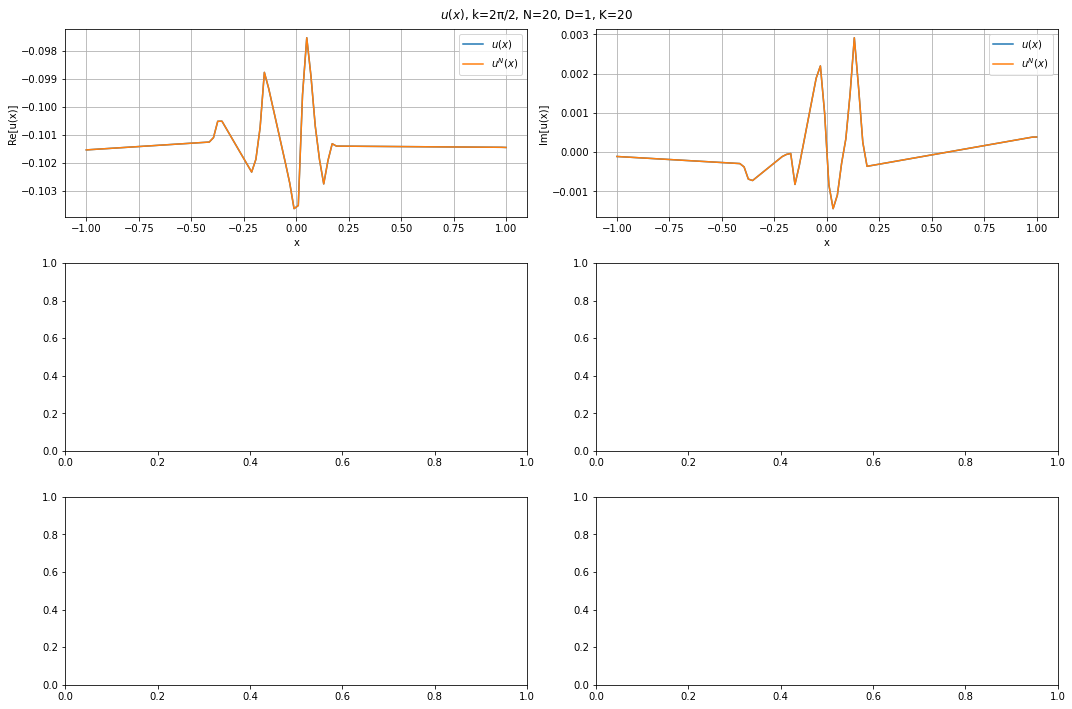

In [ ]:
xpts = torch.linspace(a, b, 100, dtype=torch.cfloat).view(-1, 1)

model.eval()
upts = model(xpts)  # FIXME: Should be exact solution
rpts = model(xpts)
with torch.no_grad():
    xpts = xpts.numpy()
    upts = upts.numpy()
    rpts = rpts.numpy()

plt.rcParams['figure.figsize'] = [15, 10]
fig, axs = plt.subplots(3, 2)
fig.tight_layout(pad=4.0)
fig.suptitle(f'$u(x)$, k={round(model.k.item() / (np.pi / 2))}π/2, N={width}, D={depth}, K={testfuncs}')

axs[0, 0].plot(xpts, upts.real, label='$u(x)$')
axs[0, 0].plot(xpts, rpts.real, label='$u^N(x)$')
axs[0, 0].set(xlabel='x', ylabel='Re[u(x)]')
axs[0, 0].legend()
axs[0, 0].grid()
axs[0, 1].plot(xpts, upts.imag, label='$u(x)$')
axs[0, 1].plot(xpts, rpts.imag, label='$u^N(x)$')
axs[0, 1].set(xlabel='x', ylabel='Im[u(x)]')
axs[0, 1].legend()
axs[0, 1].grid()

# axs[1, 0].errorbar(xpts, upts.real, yerr=upts.real - rpts.real, ecolor='black', label='$u(x)$')
# axs[1, 0].set(xlabel='x', ylabel='Re[u(x)]')
# axs[1, 0].legend()
# axs[1, 0].grid()
# axs[1, 1].errorbar(xpts, upts.imag, yerr=upts.imag - rpts.imag, ecolor='black', label='$u(x)$')
# axs[1, 1].set(xlabel='x', ylabel='Im[u(x)]')
# axs[1, 1].legend()
# axs[1, 1].grid()

# axs[2, 0].plot(xpts, upts.real - rpts.real)
# axs[2, 0].set(xlabel='x', ylabel='$Re[u(x)-u^N(x)]$')
# axs[2, 0].grid()
# axs[2, 1].plot(xpts, upts.imag - rpts.imag)
# axs[2, 1].set(xlabel='x', ylabel='$Im[u(x)-u^N(x)]$')
# axs[2, 1].grid()

/home/sepeehr/anaconda3/envs/mcss/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/sepeehr/anaconda3/envs/mcss/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/sepeehr/anaconda3/envs/mcss/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/sepeehr/anaconda3/envs/mcss/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


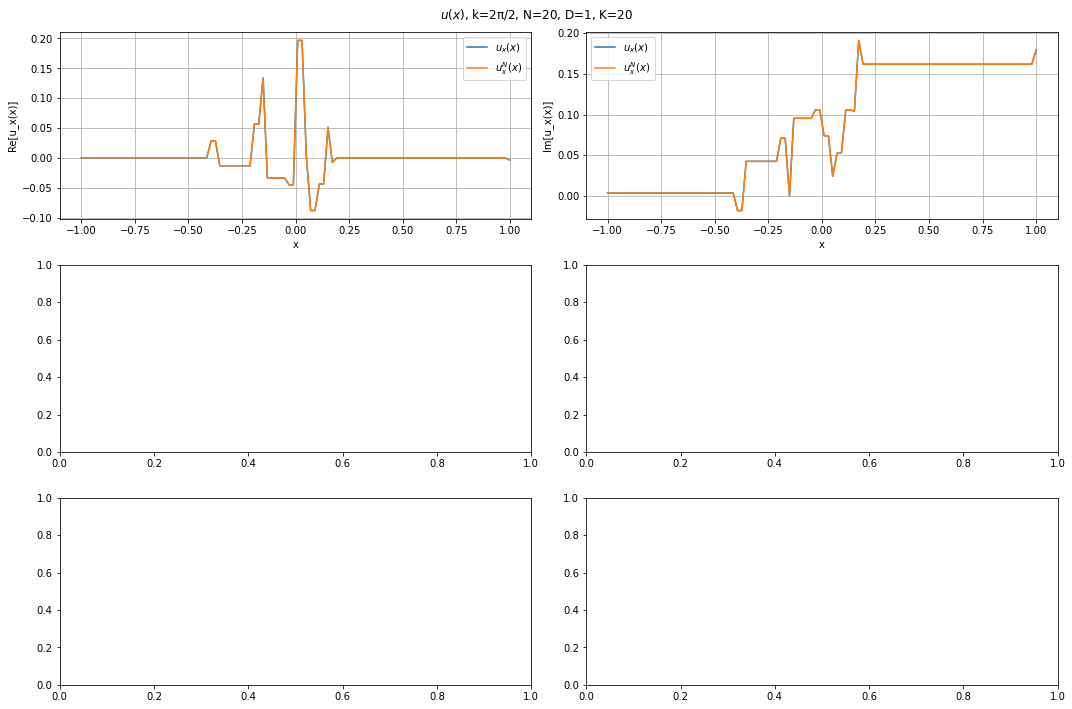

In [ ]:
xpts = torch.linspace(a, b, 100, dtype=torch.cfloat).view(-1, 1)

model.eval()
upts = model.deriv(1, xpts)  # FIXME: Should be exact solution
rpts = model.deriv(1, xpts)  # FIXME: Should be exact solution
with torch.no_grad():
    xpts = xpts.numpy()
    upts = upts.numpy()
    rpts = rpts.numpy()

plt.rcParams['figure.figsize'] = [15, 10]
fig, axs = plt.subplots(3, 2)
fig.tight_layout(pad=4.0)
fig.suptitle(f'$u(x)$, k={round(model.k.item() / (np.pi / 2))}π/2, N={width}, D={depth}, K={testfuncs}')

axs[0, 0].plot(xpts, upts.real, label='$u_x(x)$')
axs[0, 0].plot(xpts, rpts.real, label='$u^N_x(x)$')
axs[0, 0].set(xlabel='x', ylabel='Re[u_x(x)]')
axs[0, 0].legend()
axs[0, 0].grid()
axs[0, 1].plot(xpts, upts.imag, label='$u_x(x)$')
axs[0, 1].plot(xpts, rpts.imag, label='$u^N_x(x)$')
axs[0, 1].set(xlabel='x', ylabel='Im[u_x(x)]')
axs[0, 1].legend()
axs[0, 1].grid()

# axs[1, 0].errorbar(xpts, upts.real, yerr=upts.real - rpts.real, ecolor='black', label='$u_x(x)$')
# axs[1, 0].set(xlabel='x', ylabel='Re[u_x(x)]')
# axs[1, 0].legend()
# axs[1, 0].grid()
# axs[1, 1].errorbar(xpts, upts.imag, yerr=upts.imag - rpts.imag, ecolor='black', label='$u_x(x)$')
# axs[1, 1].set(xlabel='x', ylabel='Im[u_x(x)]')
# axs[1, 1].legend()
# axs[1, 1].grid()

# axs[2, 0].plot(xpts, upts.real - rpts.real)
# axs[2, 0].set(xlabel='x', ylabel='$Re[u_x(x)-u^N_x(x)]$')
# axs[2, 0].grid()
# axs[2, 1].plot(xpts, upts.imag - rpts.imag)
# axs[2, 1].set(xlabel='x', ylabel='$Im[u_x(x)-u^N_x(x)]$')
# axs[2, 1].grid()